<a href="https://colab.research.google.com/github/lfa-systems/Alura_Store_BR/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.*com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
loja1 = loja # Padronizar o nome da loja com os demais

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
dados = [loja1,loja2,loja3,loja4]

def faturamento(loja):
  """
    Esta função soma os precos da loja

    Entrada:
        loja: A base de dados da loja.

    Saída:
        Faturamento da loja.

    Ex.:
       [1384497.58, 1488459.06, 1464025.03, 1384497.58]
  """

  try:
    faturamento = loja["Preço"].sum()
  except:
    print('ERROR: Verifique os dados coletados.')

  return faturamento

faturamentos = []
for i in dados:
  faturamentos.append(faturamento(i))

print(faturamentos)


[np.float64(1534509.12), np.float64(1488459.06), np.float64(1464025.03), np.float64(1384497.58)]


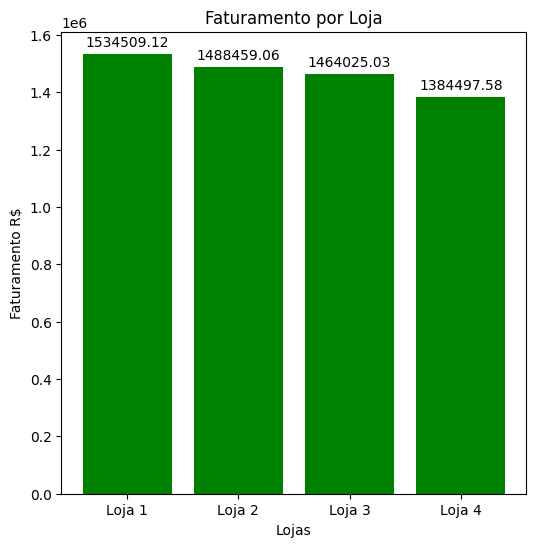

In [3]:
plt.xlabel('Lojas')
plt.ylabel('Faturamento R$')
plt.title('Faturamento por Loja')

barras = plt.bar(lojas, faturamentos, color='green')
plt.gcf().set_size_inches(6, 6)
plt.bar_label(barras, fmt='%.2f', label_type='edge' , padding=3)
plt.show()




# 2. Vendas por Categoria


In [4]:
categorias_mais_populares = []

def categoria_mais_popular(loja):
  """
    Esta função agrupa categoriasda loja e ordena a soma das quantidades decrescente.

    Entrada:
        loja: A base de dados da loja.

    Saída:
        Lista das categorias mais populares.

    Ex.:
      [ Categoria do Produto  Produto
                      moveis      465
                 eletronicos      448
                  brinquedos      324
  """
  vendas_por_categoria = loja.groupby('Categoria do Produto')['Produto'].count().reset_index()
  categorias_mais_populares = vendas_por_categoria.sort_values(by='Produto', ascending=False)
  return categorias_mais_populares

for i in dados:
  categorias_mais_populares.append(categoria_mais_popular(i))

print(categorias_mais_populares)

[    Categoria do Produto  Produto
6                 moveis      465
2            eletronicos      448
0             brinquedos      324
1       eletrodomesticos      312
3        esporte e lazer      284
4  instrumentos musicais      182
5                 livros      173
7  utilidades domesticas      171,     Categoria do Produto  Produto
6                 moveis      442
2            eletronicos      422
0             brinquedos      313
1       eletrodomesticos      305
3        esporte e lazer      275
4  instrumentos musicais      224
5                 livros      197
7  utilidades domesticas      181,     Categoria do Produto  Produto
6                 moveis      499
2            eletronicos      451
0             brinquedos      315
1       eletrodomesticos      278
3        esporte e lazer      277
5                 livros      185
4  instrumentos musicais      177
7  utilidades domesticas      177,     Categoria do Produto  Produto
6                 moveis      480
2         

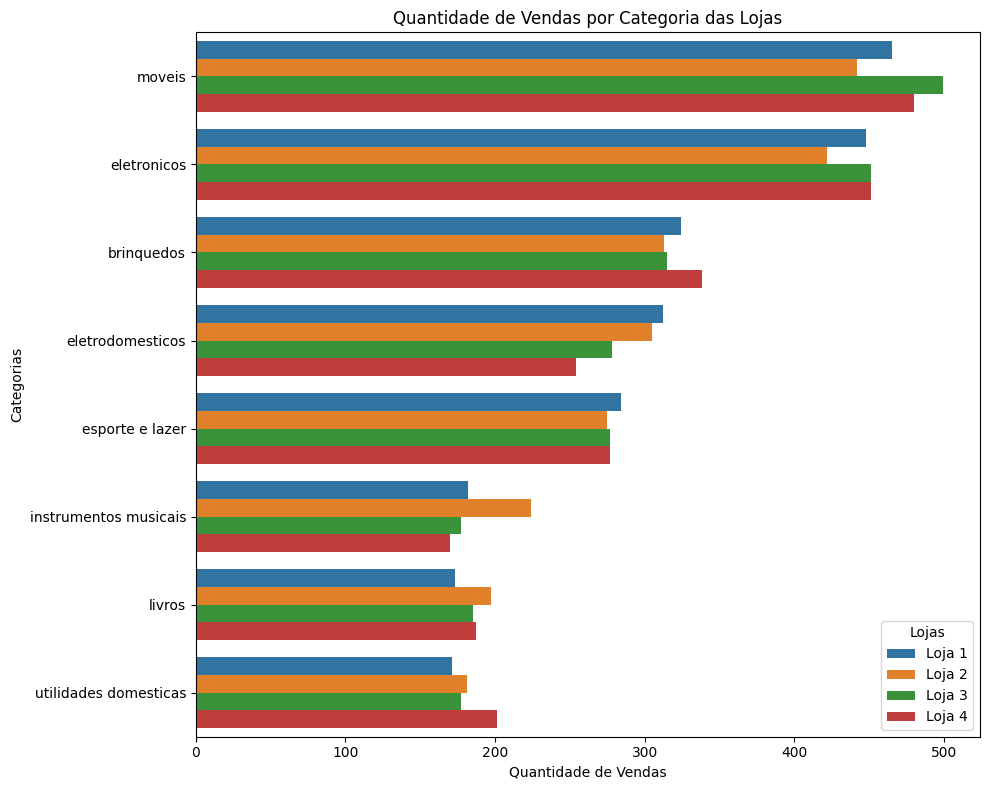

In [5]:
dadosGrafico = {}
def df_lojas(tamanho):
  """
    Esta função cria repetiçoes dos itens de lojas

    Entrada:
        tamanho: Quantidade de repetiçoes.

    Saída:
        Itens da lista de lojas repetidas conforme tamanho.

    Ex.:
    ['Loja 1', 'Loja 1', 'Loja 1', 'Loja 2', 'Loja 2', 'Loja 2']
  """
  return np.repeat(lojas, tamanho)


def df_dados(chave, lista, dados):
  """
    Esta função cria um dicionario de dados contendo as lojas, produtos, quantidades

    Entrada:
      chave = Chado para o item do dicionario de dados
      lista = Lista de dadso que contem os itens
      dados = Coluna da lista que contem os valores para a chave do dicionario
  """
  data = []
  for loja in range(len(lojas)):
    for dado in lista[loja][dados]:
        data.append(dado)
  dadosGrafico[chave] = data

dadosGrafico['Loja'] = df_lojas(len(categorias_mais_populares[0]['Produto']) ).tolist()
df_dados('Categoria', categorias_mais_populares,'Categoria do Produto')
df_dados('Quantidade', categorias_mais_populares,'Produto')

df_vendas = pd.DataFrame(dadosGrafico)
plt.figure(figsize=(10, 8))
sns.barplot(x='Quantidade', y='Categoria', hue='Loja', data=df_vendas, orient='h')

plt.title('Quantidade de Vendas por Categoria das Lojas')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Categorias')
plt.legend(title='Lojas')
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [6]:
avaliacao_loja = []
for loja in dados:
  avaliacao_loja.append(float( '%.2f' % loja["Avaliação da compra"].mean()))

print(avaliacao_loja)

[3.98, 4.04, 4.05, 4.0]


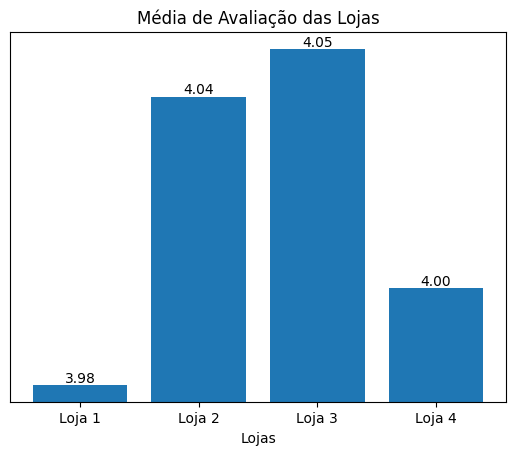

In [7]:
plt.xlabel('Lojas')
plt.ylabel('Media')
plt.title('Média de Avaliação das Lojas')
plt.yscale('log')
plt.gca().get_yaxis().set_visible(False)

barras = plt.bar(lojas, avaliacao_loja)
plt.bar_label(barras, fmt='%.2f', label_type='edge' )
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [8]:

def produtos_mais_menos_vendido(loja):
  """
    Esta função filtra os valores mais e menos vendidos da loja.
    Parâmetros:
        loja: A base de dados da loja.

    Retorna:
        Dicionários com os itens mais e menos vendidos.

    Ex.: ({'Micro-ondas': 60, 'TV Led UHD 4K': 60, 'Guarda roupas': 60, 'Secadora de roupas': 58},
          {'Pandeiro': 36, 'Panela de pressão': 35, 'Headset': 33, 'Celular ABXY': 33},
          produto  quantidade
                   Micro-ondas          60
                 TV Led UHD 4K          60
                 Guarda roupas          60
            Secadora de roupas          58
                        Cômoda          56
              Blocos de montar          56
              Bola de basquete          55
  """
  vendas_por_produto = loja['Produto'].value_counts().reset_index()
  vendas_por_produto.columns = ['produto', 'quantidade']
  itens_mais_vendido = {}
  itens_menos_vendidos = {}
  qtd_itens_vendidos = 5 # Os X mais e menos vendidos

  dados = vendas_por_produto.iloc[0:qtd_itens_vendidos].to_dict()
  for indice, produto in dados['produto'].items():
    quantidade = dados['quantidade'][indice]
    itens_mais_vendido[produto] = quantidade

  dados = vendas_por_produto.iloc[-qtd_itens_vendidos:].to_dict()
  for indice, produto in dados['produto'].items():
    quantidade = dados['quantidade'][indice]
    itens_menos_vendidos[produto] = quantidade

  return itens_mais_vendido, itens_menos_vendidos, vendas_por_produto

xmais_vendido = produtos_mais_menos_vendido(loja1)
mais_vendido_l1 = xmais_vendido[0]
menos_vendido_l1 = xmais_vendido[1]

xmais_vendido = produtos_mais_menos_vendido(loja2)
mais_vendido_l2 = xmais_vendido[0]
menos_vendido_l2 = xmais_vendido[1]

xmais_vendido = produtos_mais_menos_vendido(loja3)
mais_vendido_l3 = xmais_vendido[0]
menos_vendido_l3 = xmais_vendido[1]

xmais_vendido = produtos_mais_menos_vendido(loja4)
mais_vendido_l4 = xmais_vendido[0]
menos_vendido_l4 = xmais_vendido[1]

print('>>> Loja 1 <<<')
print("Mais vendido:", mais_vendido_l1)
print("Menos vendido:", menos_vendido_l1)

print('>>> Loja 2 <<<')
print("Mais vendido:", mais_vendido_l2)
print("Menos vendido:", menos_vendido_l2)

print('>>> Loja 3 <<<')
print("Mais vendido:", mais_vendido_l3)
print("Menos vendido:", menos_vendido_l3)

print('>>> Loja 4 <<<')
print("Mais vendido:", mais_vendido_l4)
print("Menos vendido:", menos_vendido_l4)



>>> Loja 1 <<<
Mais vendido: {'Micro-ondas': 60, 'TV Led UHD 4K': 60, 'Guarda roupas': 60, 'Secadora de roupas': 58, 'Cômoda': 56}
Menos vendido: {'Ciência de dados com python': 39, 'Pandeiro': 36, 'Panela de pressão': 35, 'Headset': 33, 'Celular ABXY': 33}
>>> Loja 2 <<<
Mais vendido: {'Iniciando em programação': 65, 'Micro-ondas': 62, 'Bateria': 61, 'Violão': 58, 'Pandeiro': 58}
Menos vendido: {'Fone de ouvido': 37, 'Poltrona': 35, 'Mesa de jantar': 34, 'Impressora': 34, 'Jogo de tabuleiro': 32}
>>> Loja 3 <<<
Mais vendido: {'Kit banquetas': 57, 'Mesa de jantar': 56, 'Cama king': 56, 'Jogo de panelas': 55, 'Cômoda': 55}
Menos vendido: {'Guitarra': 38, 'Jogo de copos': 36, 'Mochila': 36, 'Micro-ondas': 36, 'Blocos de montar': 35}
>>> Loja 4 <<<
Mais vendido: {'Cama box': 62, 'Faqueiro': 59, 'Dashboards com Power BI': 56, 'Cama king': 56, 'Carrinho controle remoto': 55}
Menos vendido: {'Geladeira': 38, 'Ciência de dados com python': 38, 'Violão': 37, 'Guarda roupas': 34, 'Guitarra': 33

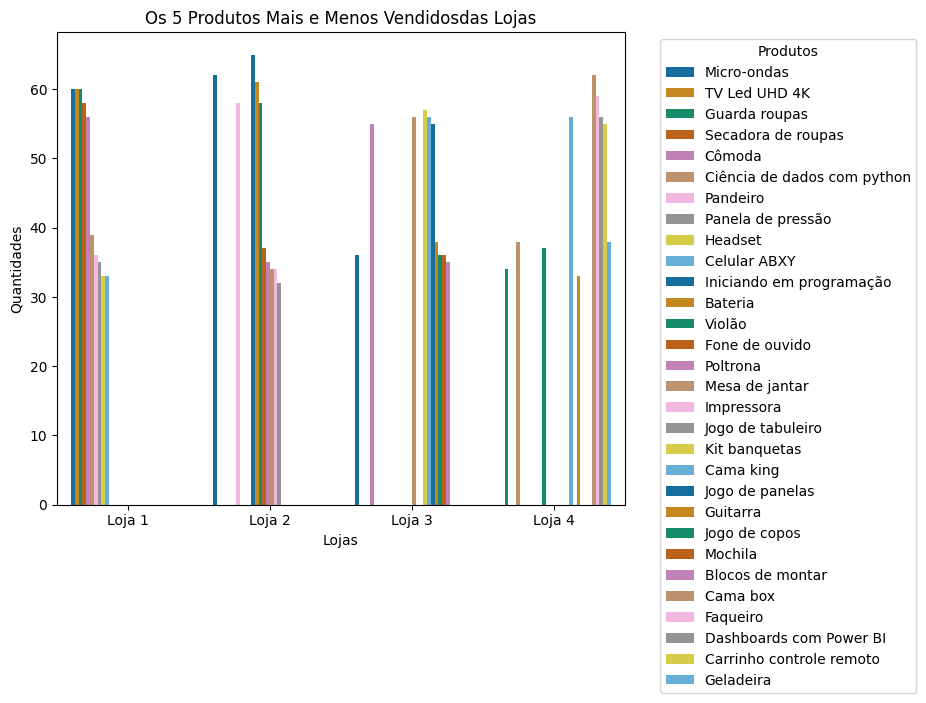

In [9]:
from collections import Counter

dadosGrafico = {}

dadosGrafico['Loja'] = np.repeat(lojas, 2 * len(mais_vendido_l1) ).tolist()
x = Counter(dadosGrafico['Loja'])[lojas[0]] / 2

dadosGrafico['produtos'] = \
list(mais_vendido_l1.keys()) + \
list(menos_vendido_l1.keys()) + \
list(mais_vendido_l2.keys()) + \
list(menos_vendido_l2.keys()) + \
list(mais_vendido_l3.keys()) + \
list(menos_vendido_l3.keys()) + \
list(mais_vendido_l4.keys()) + \
list(menos_vendido_l4.keys())

dadosGrafico['quantidade'] = \
list(mais_vendido_l1.values()) + \
list(menos_vendido_l1.values()) + \
list(mais_vendido_l2.values()) + \
list(menos_vendido_l2.values()) +\
list(mais_vendido_l3.values()) + \
list(menos_vendido_l3.values()) + \
list(mais_vendido_l4.values()) + \
list(menos_vendido_l4.values())

df_vendas = pd.DataFrame(dadosGrafico)
plt.figure(figsize=(10, 7))
palette = sns.color_palette("colorblind",30)
ax = sns.barplot(x='Loja', y='quantidade', hue='produtos', data=df_vendas, palette = palette)
plt.title(f'Os {x:0.0f} Produtos Mais e Menos Vendidosdas Lojas')

plt.xlabel('Lojas')
plt.ylabel('Quantidades')
plt.legend(title='Produtos', bbox_to_anchor=(1.05, 1))
plt.tight_layout(pad=3.0)
plt.show()


# 5. Frete Médio por Loja


In [10]:
media_frete_l1 = loja1["Frete"].mean()
media_frete_l2 = loja2["Frete"].mean()
media_frete_l3 = loja3["Frete"].mean()
media_frete_l4 = loja4["Frete"].mean()

print(media_frete_l1.round(2).item(), media_frete_l2.round(2).item(), media_frete_l3.round(2).item(), media_frete_l4.round(2).item())

34.69 33.62 33.07 31.28


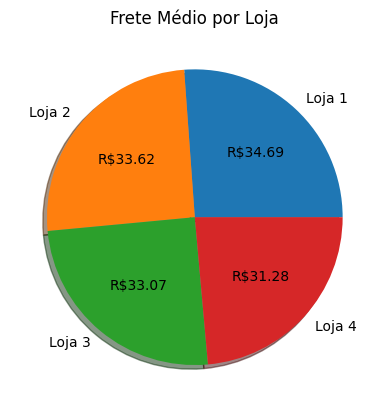

In [11]:
valores = [media_frete_l1.round(2).item(), media_frete_l2.round(2).item(), media_frete_l3.round(2).item(), media_frete_l4.round(2).item()]
plt.pie(
    valores,
    labels=lojas, autopct=lambda v:f"R${sum(valores)*v/100:.2f}", shadow=True)
plt.title('Frete Médio por Loja')
plt.show()